In [11]:
import sys
!{sys.executable} -m pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


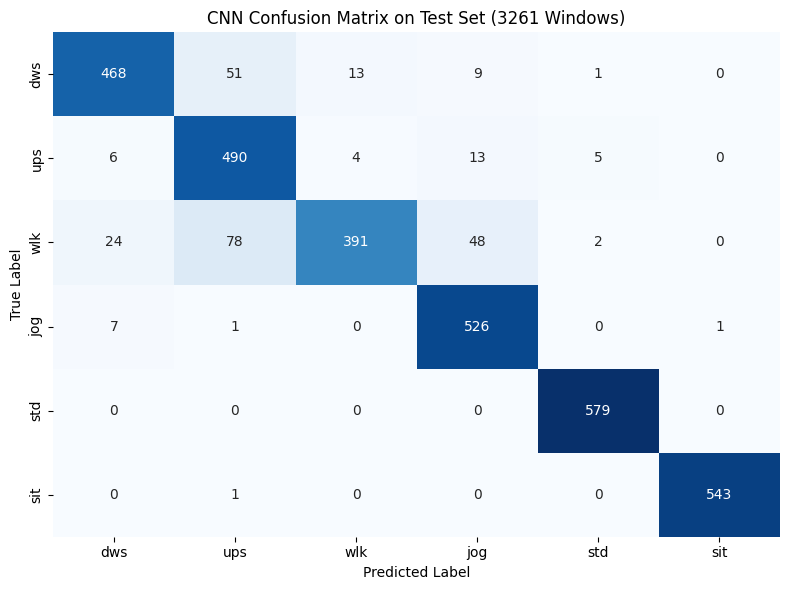

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Updated confusion matrix from your final model
confusion_matrix = np.array([
    [468, 51, 13, 9, 1, 0],
    [6, 490, 4, 13, 5, 0],
    [24, 78, 391, 48, 2, 0],
    [7, 1, 0, 526, 0, 1],
    [0, 0, 0, 0, 579, 0],
    [0, 1, 0, 0, 0, 543]
])

# Class labels
labels = ["dws", "ups", "wlk", "jog", "std", "sit"]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CNN Confusion Matrix on Test Set (3261 Windows)")
plt.tight_layout()
plt.show()


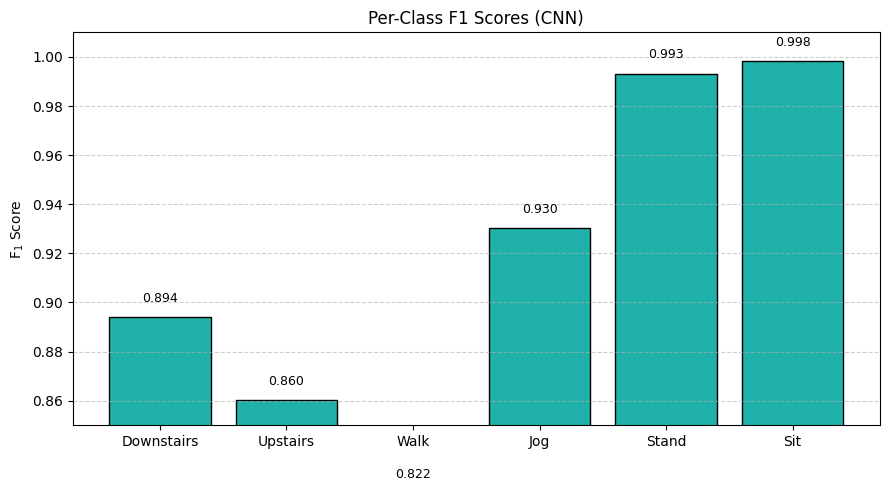

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Your updated confusion matrix
conf_matrix = np.array([
    [468, 51, 13, 9, 1, 0],
    [6, 490, 4, 13, 5, 0],
    [24, 78, 391, 48, 2, 0],
    [7, 1, 0, 526, 0, 1],
    [0, 0, 0, 0, 579, 0],
    [0, 1, 0, 0, 0, 543]
])

# Manually compute per-class F1 scores
f1_scores = []
for i in range(len(conf_matrix)):
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[:, i]) - TP
    FN = np.sum(conf_matrix[i, :]) - TP
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0
    f1_scores.append(f1)

# Activity labels
labels = ["Downstairs", "Upstairs", "Walk", "Jog", "Stand", "Sit"]

# Plot bar chart
plt.figure(figsize=(9, 5))
bars = plt.bar(labels, f1_scores, color='lightseagreen', edgecolor='black')

# Annotate each bar with the F1 score
for bar, score in zip(bars, f1_scores):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005,
             f"{score:.3f}", ha='center', va='bottom', fontsize=9)

plt.ylim(0.85, 1.01)
plt.ylabel("F$_1$ Score")
plt.title("Per-Class F1 Scores (CNN)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

